In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session, sessionmaker
from sqlalchemy import create_engine, func, MetaData, text
from sqlalchemy.ext.declarative import declarative_base
Base = automap_base()

In [2]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [3]:
# reflect an existing database into a new model
metadata= MetaData(bind = engine)
metadata.reflect()
Base = automap_base(metadata = metadata)
# reflect the tables
Base.prepare()

In [4]:
# View all of the classes that automap found
Base.classes.items()

[('measurement', sqlalchemy.ext.automap.measurement),
 ('station', sqlalchemy.ext.automap.station)]

In [7]:
# Save references to each table
tab_references = {}

for table_name in metadata.tables:
    tab_references[table_name] = Base.classes.get(table_name)

for table_name, table_class in tab_references.items():
    print(table_name,table_class)


Base.prepare(autoload_with=engine)
Measurement = Base.classes.measurement
Station = Base.classes.station


measurement <class 'sqlalchemy.ext.automap.measurement'>
station <class 'sqlalchemy.ext.automap.station'>


C:\Users\emagp\AppData\Local\Temp\ipykernel_6968\3938347117.py:11: SAWarning: This declarative base already contains a class with the same class name and module name as sqlalchemy.ext.automap.measurement, and will be replaced in the string-lookup table.
  Base.prepare(autoload_with=engine)
C:\Users\emagp\AppData\Local\Temp\ipykernel_6968\3938347117.py:11: SAWarning: This declarative base already contains a class with the same class name and module name as sqlalchemy.ext.automap.station, and will be replaced in the string-lookup table.
  Base.prepare(autoload_with=engine)


In [8]:
# Create our session (link) from Python to the DB
Session = sessionmaker(bind = engine)
session = Session()

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

recent_date = pd.read_sql("SELECT MAX(date) FROM measurement", conn)
recent_date

#August 23, 2017


,MAX(date)
0,2017-08-23


<Axes: xlabel='date', ylabel='Inches'>

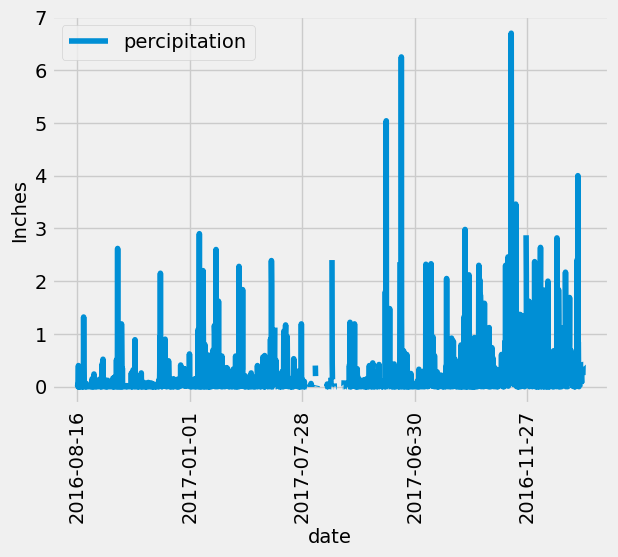

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# 2016-08-23

# Perform a query to retrieve the data and precipitation scores
year_data = pd.read_sql("SELECT * FROM measurement WHERE date > '2016-08-15' and date < '2017-08-17'", conn)


# Save the query results as a Pandas DataFrame. Explicitly set the column names
year_df = pd.DataFrame(year_data)
year_df = year_df.rename(columns={'prcp':'percipitation'})


# Sort the dataframe by date
year_df.sort_index()
date_prcp_df = year_df.loc[:,['date','percipitation']]
date_prcp_df
# Use Pandas Plotting with Matplotlib to plot the data
date_prcp_df.plot(x = 'date',y = 'percipitation', rot = 90, ylabel = 'Inches',kind = 'line')




In [42]:
# Use Pandas to calculate the summary statistics for the precipitation data
date_prcp_df.describe()


,percipitation
count,2042.000000
mean,0.180573
std,0.465205
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [11]:
# Design a query to calculate the total number of stations in the dataset
station_count = pd.read_sql("SELECT COUNT(DISTINCT station) AS unique_count FROM measurement", conn)

print(station_count)

   unique_count
0             9


In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = pd.read_sql("SELECT station, COUNT(*) AS row_count \
FROM measurement \
GROUP BY station \
ORDER BY row_count DESC;",conn)

print(station_activity)

       station  row_count
0  USC00519281       2772
1  USC00519397       2724
2  USC00513117       2709
3  USC00519523       2669
4  USC00516128       2612
5  USC00514830       2202
6  USC00511918       1979
7  USC00517948       1372
8  USC00518838        511


In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = pd.read_sql("SELECT tobs FROM measurement WHERE station = 'USC00519281'",conn)
most_active = pd.DataFrame(most_active)
most_active.describe()

#lowest = 54, highest = 85, average = 71.66

,tobs
count,2772.000000
mean,71.663781
std,4.357642
min,54.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,85.000000


<Axes: ylabel='Frequency'>

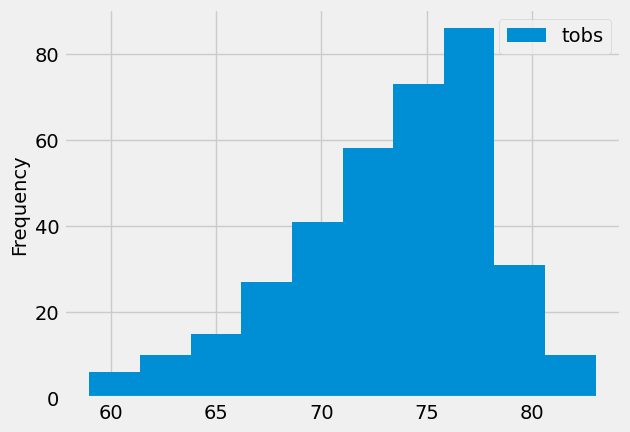

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_hist = pd.read_sql("SELECT tobs FROM measurement WHERE station = 'USC00519281' \
                          and date > '2016-08-15' and date < '2017-08-17'",conn)

active_hist.plot(kind = 'hist')

# Close Session

In [16]:
# Close Session
session.close()